In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling


C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\User

In [2]:
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv("E:\Datasets\HR_comma_sep.csv")

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [8]:
# Removing duplicate rows

In [9]:
data.loc[data.duplicated(),]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [12]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64','int64']]

In [13]:
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [14]:
print(numeric_var_names)
print(cat_var_names)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


In [15]:
data_num=data[numeric_var_names]
data_cat=data[cat_var_names]

In [16]:
# Data Audit Report

In [17]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [18]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
satisfaction_level,11991.0,0.0,7550.23,0.629658,0.66,0.241070,0.058115,0.09,0.10,0.14,0.24,0.48,0.66,0.82,0.92,0.96,0.99,1.0
last_evaluation,11991.0,0.0,8593.74,0.716683,0.72,0.168343,0.028339,0.36,0.39,0.47,0.50,0.57,0.72,0.86,0.95,0.98,1.00,1.0
number_project,11991.0,0.0,45600.00,3.802852,4.00,1.163238,1.353123,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,7.00,7.0
average_montly_hours,11991.0,0.0,2403878.00,200.473522,200.00,48.727813,2374.399778,96.00,104.00,130.00,138.00,157.00,200.00,243.00,265.00,273.00,296.00,310.0
time_spend_company,11991.0,0.0,40348.00,3.364857,3.00,1.330240,1.769537,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,8.00,10.0
Work_accident,11991.0,0.0,1850.00,0.154282,0.00,0.361234,0.130490,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
left,11991.0,0.0,1991.00,0.166041,0.00,0.372133,0.138483,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
promotion_last_5years,11991.0,0.0,203.00,0.016929,0.00,0.129012,0.016644,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0


In [19]:
# Handling Outliers

In [20]:
def outlier_capping(x):
    x.clip_upper(x.quantile(0.99))
    x.clip_lower(x.quantile(0.01))
    return x


In [21]:
data_num=data_num.apply(lambda x:outlier_capping(x))

In [22]:
data_cat.columns

Index(['department', 'salary'], dtype='object')

In [23]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [24]:
for col in data_cat.columns:
    data_cat[col] = data_cat[col].astype('category')
    data_cat =create_dummies(data_cat , col )
    

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
data_cat.columns

Index(['department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [26]:
data_new=pd.concat([data_num,data_cat],axis=1)

In [27]:
data_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [28]:
data_new.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,0.010416,-0.000755
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.000914,0.002484
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.000675,0.002065
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,-0.032541,0.016612
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.001580,-0.003108
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,0.099113,-0.047214
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,-0.076576,0.041601
department_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,1.000000,-0.057925,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.007301,0.014761
department_accounting,-0.021056,0.007244,0.006286,0.001938,0.006910,-0.009178,0.005955,-0.001497,-0.057925,1.000000,-0.053684,-0.045397,-0.056989,-0.057569,-0.142173,-0.098892,-0.112135,-0.000955,-0.007934


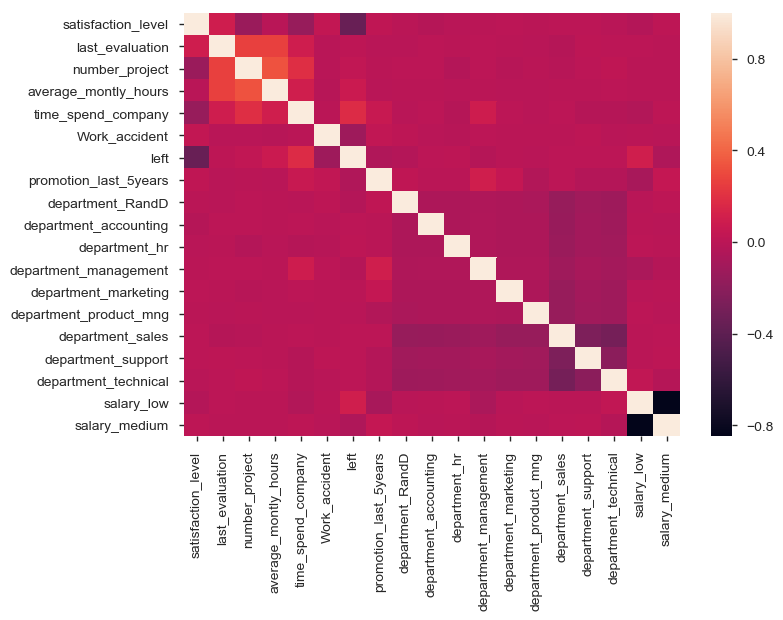

In [29]:
sns.heatmap(data_new.corr())

In [30]:
data_new.columns.difference(['left'])

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


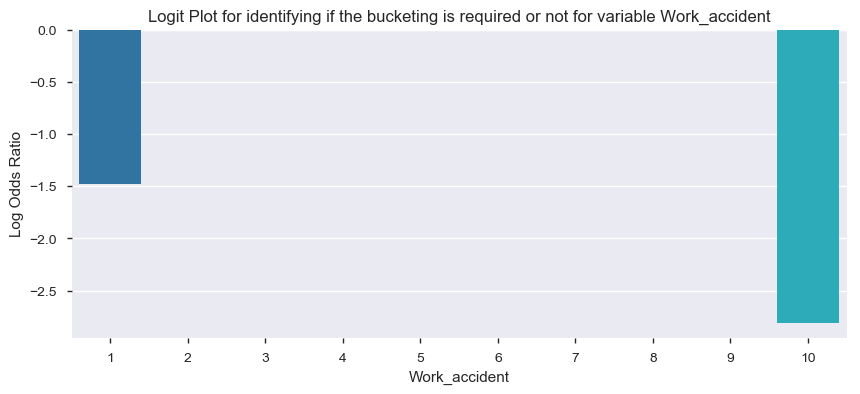

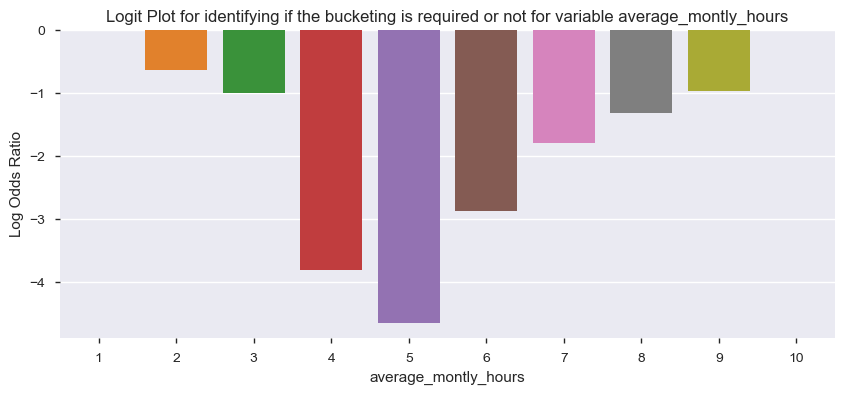

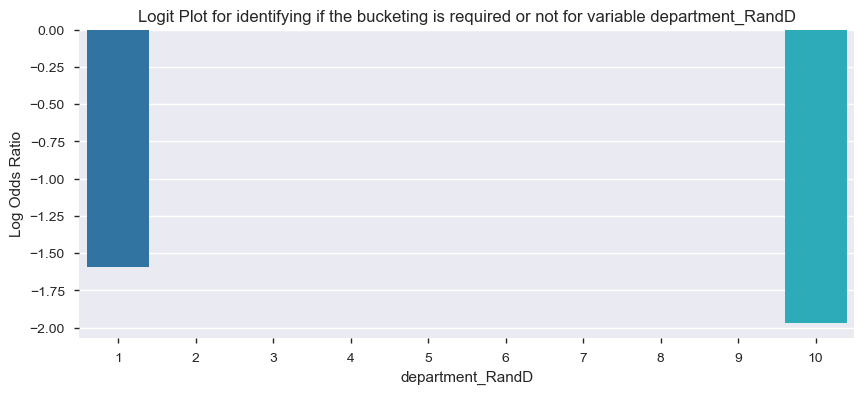

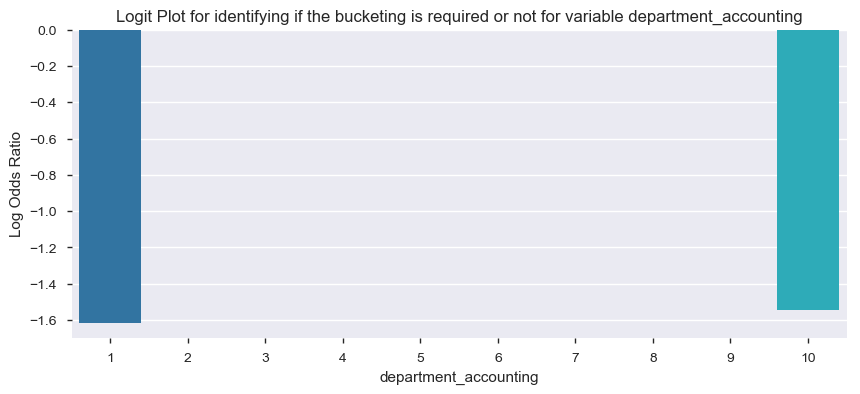

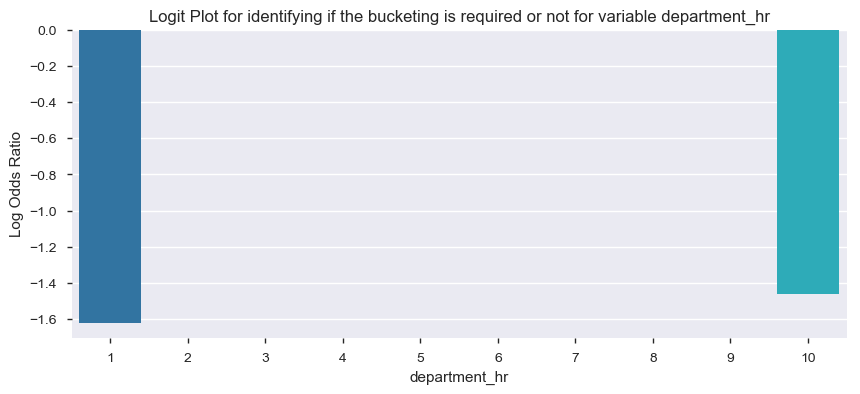

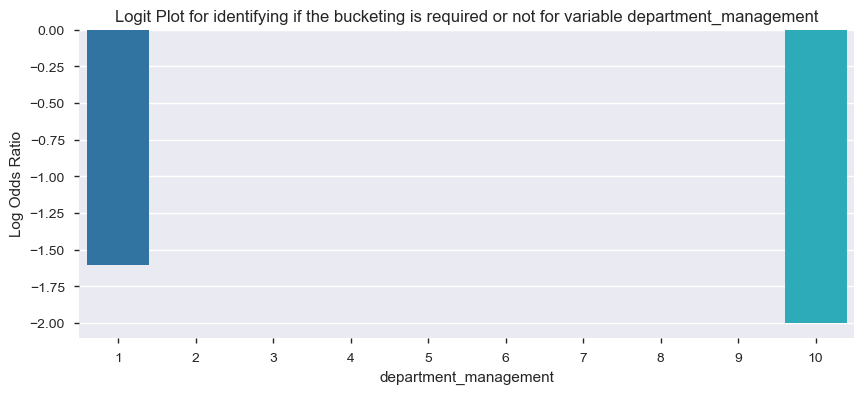

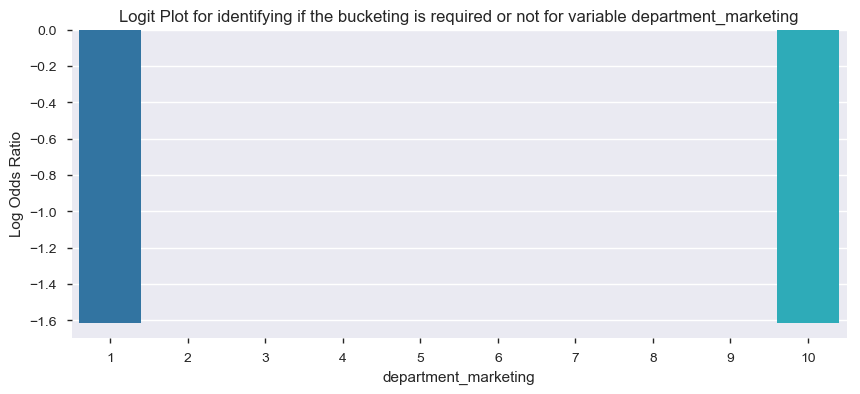

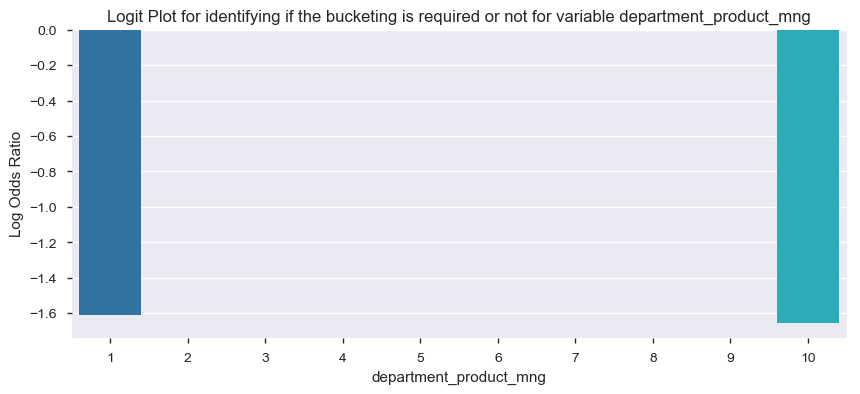

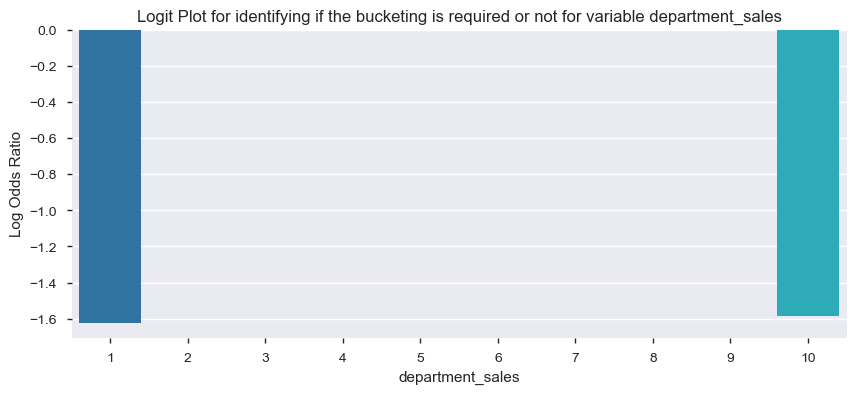

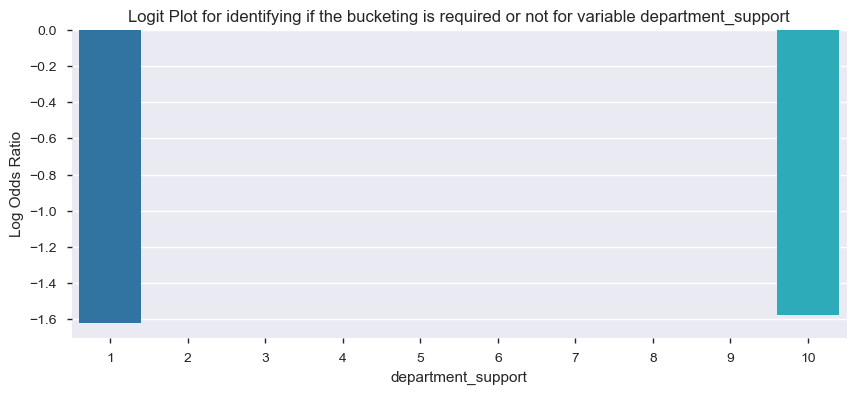

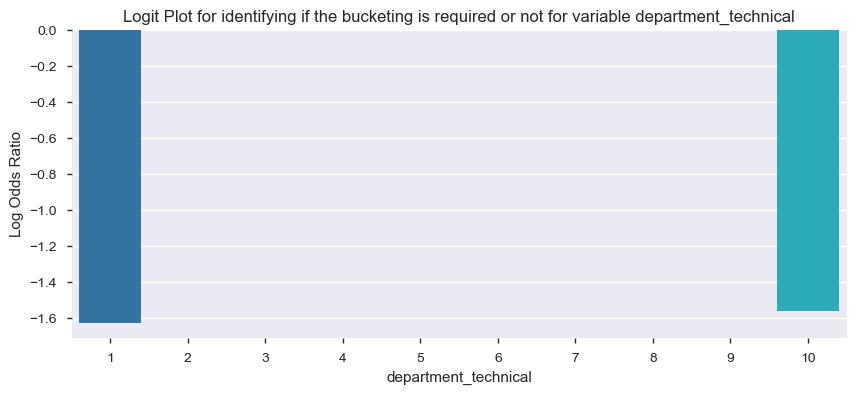

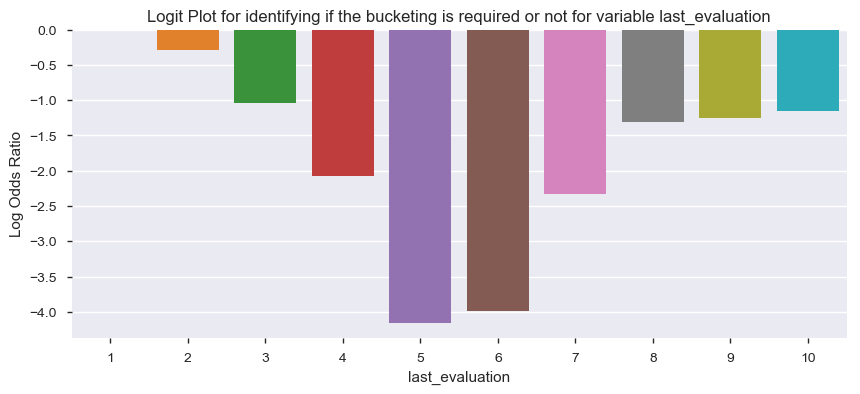

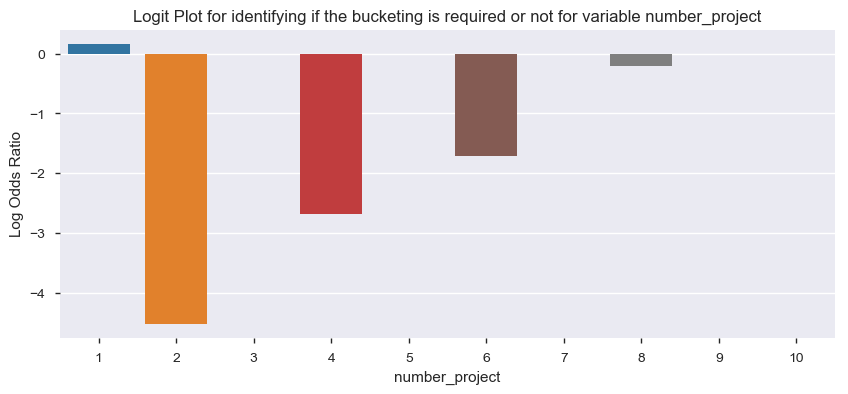

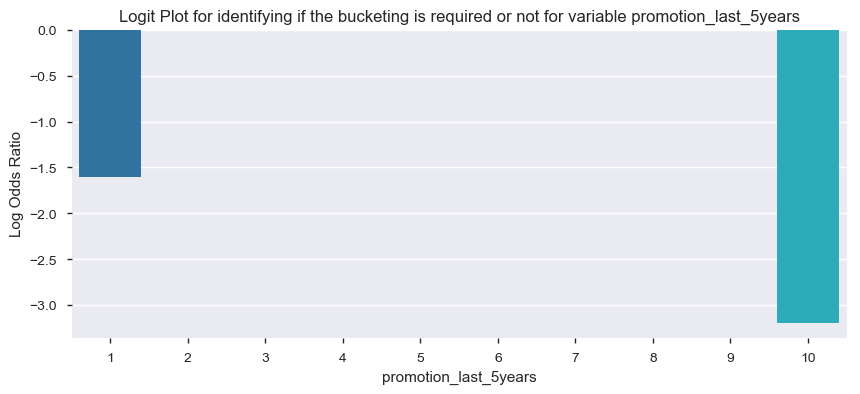

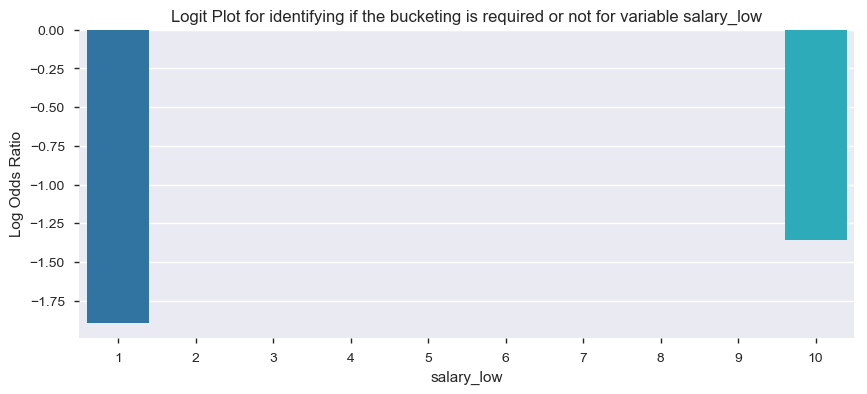

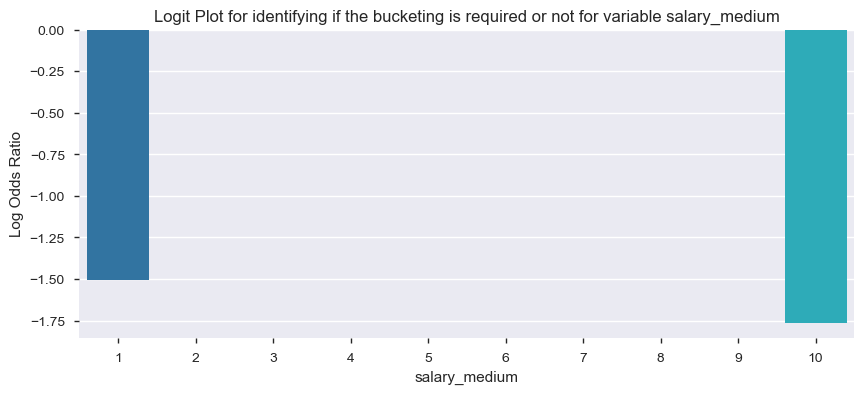

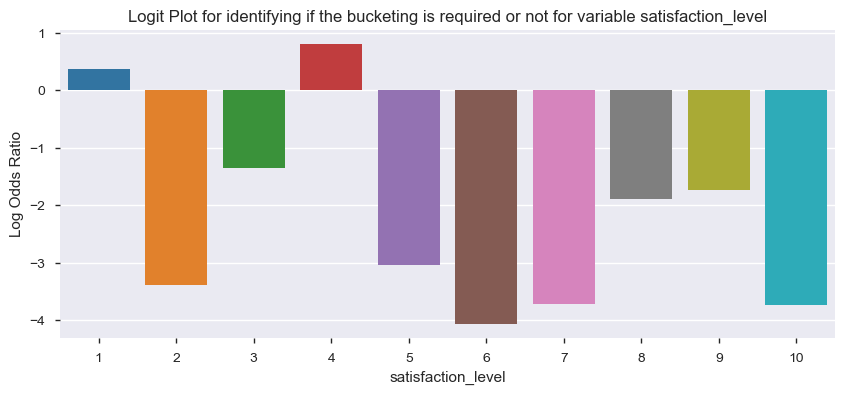

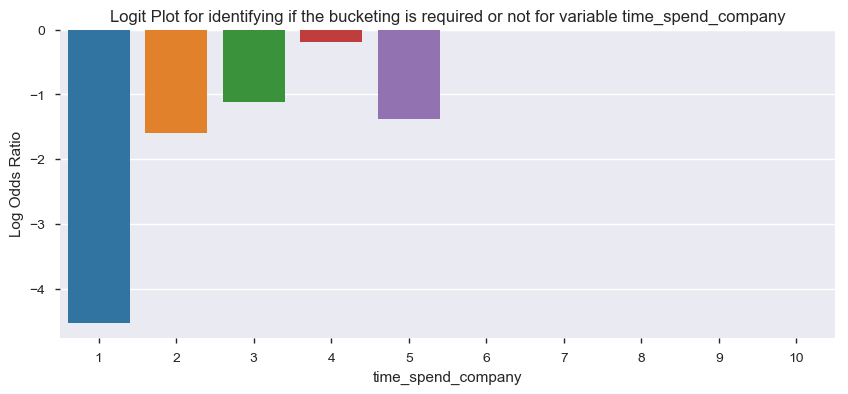

In [31]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in data_new.columns.difference(['left']):
    binned = pd.cut(data_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_new.groupby(binned)['left'].sum() / (data_new.groupby(binned)['left'].count()-data_new.groupby(binned)['left'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

###### 2.5 Data Exploratory Analysis
    - Variable Reduction using Somer's D values

In [32]:
somersd_df = pd.DataFrame()
for num_variable in data_new.columns.difference(['left']):
    logreg = sm.logit(formula = str('left ~ ')+str(num_variable), data=data_new)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data_new['left'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.439856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447070
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449536
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449464
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449553
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449534
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449535
  

,Variable Name,SomersD
0,Work_accident,0.121763
0,average_montly_hours,0.0738999
0,department_RandD,0.0182079
0,department_accounting,0.00354636
0,department_hr,0.0079554
0,department_management,0.0122825
0,department_marketing,0.000153139
0,department_product_mng,0.00235138
0,department_sales,0.00734309
0,department_support,0.00580517


In [33]:
somersd_df.sort_values(by='SomersD', ascending=False)

,Variable Name,SomersD
0,satisfaction_level,0.494017
0,time_spend_company,0.381564
0,salary_low,0.133053
0,Work_accident,0.121763
0,average_montly_hours,0.0738999
0,salary_medium,0.0629619
0,department_RandD,0.0182079
0,promotion_last_5years,0.0154819
0,department_management,0.0122825
0,department_technical,0.0104815


##### Recursive Feature Elimination

In [34]:
features=data_new[data_new.columns.difference( ['left'])]

In [35]:
target=target = data_new['left']

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import itertools

In [37]:
lm =LogisticRegression()
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features, target)

In [38]:
RFE_features=features.columns[rfe.get_support()]

In [39]:
RFE_features

Index(['Work_accident', 'department_RandD', 'department_management',
       'last_evaluation', 'number_project', 'promotion_last_5years',
       'salary_low', 'salary_medium', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

In [40]:
features1 = features[RFE_features]
features1.head()

,Work_accident,department_RandD,department_management,last_evaluation,number_project,promotion_last_5years,salary_low,salary_medium,satisfaction_level,time_spend_company
0,0,0,0,0.53,2,0,1,0,0.38,3
1,0,0,0,0.86,5,0,0,1,0.80,6
2,0,0,0,0.88,7,0,0,1,0.11,4
3,0,0,0,0.87,5,0,1,0,0.72,5
4,0,0,0,0.52,2,0,1,0,0.37,3


#### F Regression

In [41]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [42]:
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [43]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [44]:
f_reg_results.sort_values(by=['F_Value'], ascending=False)

,Variable,F_Value,P_Value
16,satisfaction_level,1679.771877,0.000
17,time_spend_company,371.191456,0.000
0,Work_accident,191.653946,0.000
14,salary_low,118.941220,0.000
1,average_montly_hours,59.731265,0.000
15,salary_medium,26.785274,0.000
13,promotion_last_5years,23.957119,0.000
12,number_project,11.478685,0.001
2,department_RandD,10.102211,0.001
5,department_management,7.152013,0.007


In [45]:
selected=f_reg_results.sort_values(by=['F_Value'], ascending=False)

In [46]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 16 to 6
Data columns (total 3 columns):
Variable    18 non-null object
F_Value     18 non-null float64
P_Value     18 non-null object
dtypes: float64(1), object(2)
memory usage: 576.0+ bytes


In [47]:
selected['P_Value']=pd.to_numeric(selected['P_Value'])

In [48]:
selected.loc[(selected.P_Value<0.05),['Variable']]

,Variable
16,satisfaction_level
17,time_spend_company
0,Work_accident
14,salary_low
1,average_montly_hours
15,salary_medium
13,promotion_last_5years
12,number_project
2,department_RandD
5,department_management


In [49]:
final=selected.loc[(selected.P_Value<0.05),['Variable']]

In [50]:
F_Reg_vars=[sel for sel in final.Variable]

In [51]:
F_Reg_vars

['satisfaction_level',
 'time_spend_company',
 'Work_accident',
 'salary_low',
 'average_montly_hours',
 'salary_medium',
 'promotion_last_5years',
 'number_project',
 'department_RandD',
 'department_management']

In [52]:
RFE_vars=list(RFE_features)

In [53]:
sel_vars=RFE_vars+F_Reg_vars

In [54]:
sel_vars=list(set(sel_vars))

In [55]:
sel_vars

['Work_accident',
 'salary_low',
 'department_management',
 'promotion_last_5years',
 'last_evaluation',
 'satisfaction_level',
 'department_RandD',
 'salary_medium',
 'average_montly_hours',
 'time_spend_company',
 'number_project']

#### VIF

In [56]:
all_columns = "+".join(sel_vars)
my_formula = "left~" + all_columns

print(my_formula)

left~Work_accident+salary_low+department_management+promotion_last_5years+last_evaluation+satisfaction_level+department_RandD+salary_medium+average_montly_hours+time_spend_company+number_project


In [57]:
my_formula='left~number_project+time_spend_company+average_montly_hours+department_management+promotion_last_5years+satisfaction_level+last_evaluation+Work_accident+salary_low+department_RandD'

In [58]:
y, X = dmatrices(my_formula, data_new, return_type='dataframe')

In [59]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,43.0,Intercept
1,1.2,number_project
2,1.1,time_spend_company
3,1.2,average_montly_hours
4,1.0,department_management
5,1.0,promotion_last_5years
6,1.1,satisfaction_level
7,1.1,last_evaluation
8,1.0,Work_accident
9,1.0,salary_low


In [60]:
#Train and Test split
train, test = train_test_split(data_new, test_size=0.3, random_state=42)


In [61]:
print(len(train))
print(len(test))

8393
3598


### Building logistic Regression

In [62]:
logreg = sm.logit(my_formula, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.363268
         Iterations 7


In [63]:
print(result.summary2())

                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.190      
Dependent Variable:   left              AIC:               6119.8242  
Date:                 2019-06-20 20:15  BIC:               6197.2109  
No. Observations:     8393              Log-Likelihood:    -3048.9    
Df Model:             10                LL-Null:           -3764.1    
Df Residuals:         8382              LLR p-value:       2.8112e-301
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.9149   0.1943  -4.7088 0.0000 -1.2958 -0.5341
number_project        -0.2722   0.0306  -8.8957 0.0000 -0.3322 -0.2122
time_spend_company     0.2926   0.

In [64]:
train_gini = 2*metrics.roc_auc_score(train['left'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.6331307197205784
The Gini Index for the model built on the Test Data is :  0.6599207634614905


In [65]:
train_auc = metrics.roc_auc_score(train['left'], result.predict(train))
test_auc = metrics.roc_auc_score(test['left'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.8165653598602892
The AUC for the model built on the Test Data is :  0.8299603817307453


In [66]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['left']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
6957,0,0.014928
9240,0,0.204150
618,1,0.210186
9296,0,0.060987
6030,0,0.159131


In [67]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['left']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
397,1,0.715745
3107,0,0.084018
9331,0,0.082010
357,1,0.393629
1326,1,0.620898


In [68]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [69]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.165376
0,0.020408,0.996398,0.081370,0.232694
0,0.040816,0.982709,0.227552,0.352437
0,0.061224,0.971902,0.361742,0.462647
0,0.081633,0.938040,0.470949,0.548195
0,0.102041,0.899856,0.561742,0.617658
0,0.122449,0.858069,0.633547,0.670678
0,0.142857,0.803314,0.688223,0.707256
0,0.163265,0.765850,0.735475,0.740498
0,0.183673,0.740634,0.772448,0.767187


In [70]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [71]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.165376,1.000000
0,0.020408,0.996398,0.081370,0.232694,1.077768
0,0.040816,0.982709,0.227552,0.352437,1.210261
0,0.061224,0.971902,0.361742,0.462647,1.333644
0,0.081633,0.938040,0.470949,0.548195,1.408990


In [72]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.183673,0.740634,0.772448,0.767187,1.513082


#### Choosen Best Cut-off is 0.18 based on highest (sensitivity+specicity)

In [73]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.18 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.18 else 0)

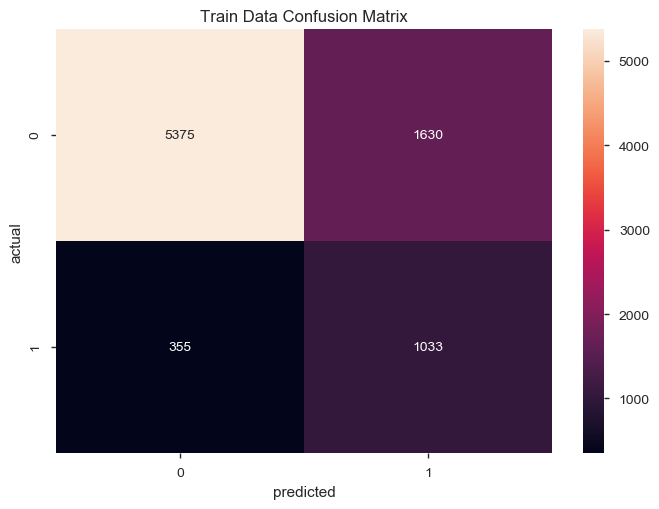

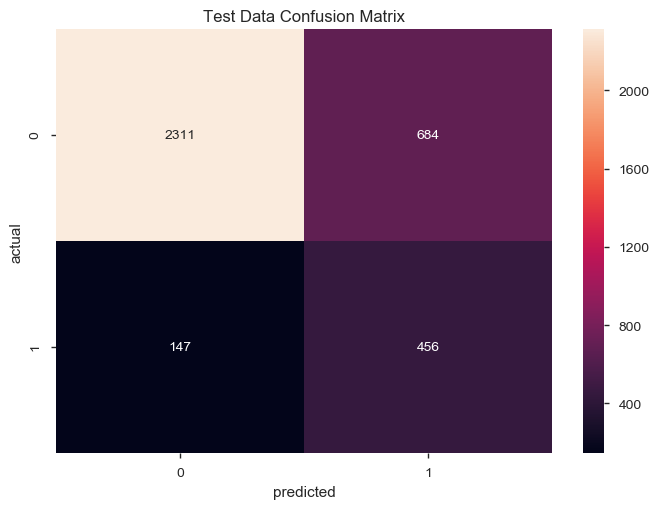

In [74]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [75]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.7634933873465983
The overall accuracy score for the Test Data  is :  0.7690383546414675


In [76]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

             precision    recall  f1-score   support

          0       0.94      0.77      0.84      7005
          1       0.39      0.74      0.51      1388

avg / total       0.85      0.76      0.79      8393



In [77]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

          0       0.94      0.77      0.85      2995
          1       0.40      0.76      0.52       603

avg / total       0.85      0.77      0.79      3598



#### Decile Analysis

In [78]:
#Decile analysis for validation of models - Business validation

In [79]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [80]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

In [81]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [82]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [83]:
Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.902383,0.393915,368,472,840
8,0.393599,0.261486,348,491,839
7,0.261472,0.191288,296,543,839
6,0.191279,0.139964,114,725,839
5,0.139959,0.106194,112,727,839
4,0.106175,0.081020,66,774,840
3,0.081013,0.059760,47,792,839
2,0.059758,0.041972,12,827,839
1,0.041955,0.025919,15,824,839


In [84]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.870445,0.391876,155,205,360
8,0.391827,0.261827,177,183,360
7,0.261502,0.189159,113,247,360
6,0.188608,0.138062,54,305,359
5,0.137771,0.103817,50,310,360
4,0.103724,0.077300,30,330,360
3,0.077211,0.059108,13,346,359
2,0.059084,0.042309,3,357,360
1,0.042283,0.026236,6,354,360


 <center>
    <h1>
    
    K-Nearest Neighbor
    </h1>
    
</center>

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [86]:
tuned_parameters=[{'n_neighbors':[3,5,7,9,11]}]
knn_clf=GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=5,scoring='accuracy')

In [87]:
train_X, test_X, train_y, test_y = train_test_split( X,
                                                  data['left'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [88]:
knn_clf.fit(train_X,train_y)
knn_clf.best_score_

0.9522220898367687

In [89]:
knn_clf.best_params_

{'n_neighbors': 5}

In [90]:
#With multiple tunning parameters

In [91]:
tuned_parameters=[{'n_neighbors':[3,5,7,9,11],'weights':['distance','uniform']}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [92]:
knn_clf.fit(train_X, train_y )

knn_clf.best_score_

0.9522220898367687

In [93]:
knn_clf.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [94]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )

Text(0.5,28.3611,'Predicted label')

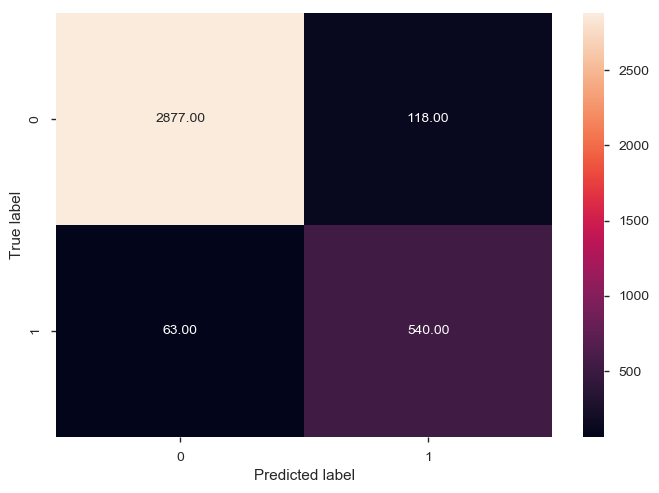

In [95]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [96]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.9496942745969983

In [97]:
print(metrics.classification_report(knn_clf.predict(train_X), train_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7005
          1       1.00      1.00      1.00      1388

avg / total       1.00      1.00      1.00      8393



In [98]:
print(metrics.classification_report(knn_clf.predict(test_X), test_y))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2940
          1       0.90      0.82      0.86       658

avg / total       0.95      0.95      0.95      3598



In [99]:
#with metrics as AUC

In [100]:
tuned_parameters=[{'n_neighbors':[3,5,7,9,11],'weights':['distance','uniform']}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')

In [101]:
knn_clf.fit(train_X, train_y )

knn_clf.best_score_

0.9650611548247576

In [102]:
knn_clf.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [103]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )

Text(0.5,28.3611,'Predicted label')

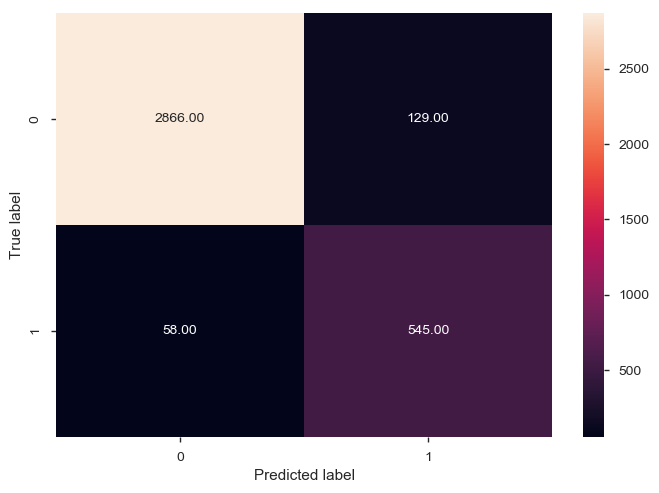

In [104]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<Center>
    <h1>Naive Bayes Classifier</h1>
    </center>

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import seaborn as sns

In [106]:
nb_clf=GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None)

In [107]:
print(metrics.classification_report(nb_clf.predict(train_X), train_y))

             precision    recall  f1-score   support

          0       0.86      0.93      0.90      6472
          1       0.68      0.49      0.57      1921

avg / total       0.82      0.83      0.82      8393



In [108]:
print(metrics.classification_report(nb_clf.predict(test_X), test_y))

             precision    recall  f1-score   support

          0       0.87      0.94      0.90      2787
          1       0.71      0.53      0.61       811

avg / total       0.84      0.85      0.84      3598



Text(0.5,28.3611,'Predicted label')

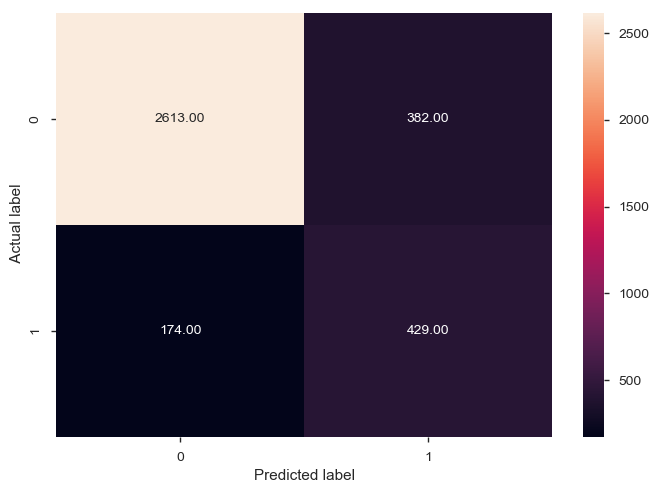

In [109]:
nb_cm=metrics.confusion_matrix(test_y,nb_clf.predict(test_X))
sns.heatmap(nb_cm,annot=True,fmt='.2f')
plt.ylabel(' Actual label')
plt.xlabel('Predicted label')

<center>
    <h1>Decision Trees</h1>
    </center>

In [110]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export
from sklearn.grid_search import GridSearchCV

In [111]:
clf_tree=DecisionTreeClassifier(max_depth=3)
clf_tree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
pd.DataFrame(clf_tree.predict_proba(train_X))

,0,1
0,0.990566,0.009434
1,0.955867,0.044133
2,0.190409,0.809591
3,0.990566,0.009434
4,0.990566,0.009434
5,0.990566,0.009434
6,0.990566,0.009434
7,0.990566,0.009434
8,0.990566,0.009434
9,0.967302,0.032698


In [113]:
tree_train_predict=pd.DataFrame({'actual':train_y,'predicted':clf_tree.predict(train_X)})

In [114]:
tree_train_predict.head(10)

,actual,predicted
6957,0,0
9240,0,0
618,1,1
9296,0,0
6030,0,0
9849,0,0
8210,0,0
7921,0,0
2661,0,0
6218,0,0


In [115]:
tree_test_predicted=pd.DataFrame({'actual':test_y,'predicted':clf_tree.predict(test_X)})

In [116]:
tree_test_predicted.head(10)

,actual,predicted
397,1,1
3107,0,0
9331,0,0
357,1,1
1326,1,1
1657,1,1
5844,0,0
9805,0,0
10754,0,0
3644,0,0


In [117]:
metrics.accuracy_score(tree_train_predict.actual,tree_train_predict.predicted)

0.9515072083879423

In [118]:
metrics.accuracy_score(tree_test_predicted.actual,tree_test_predicted.predicted)

0.952195664257921

Text(0.5,28.3611,'Predicted label')

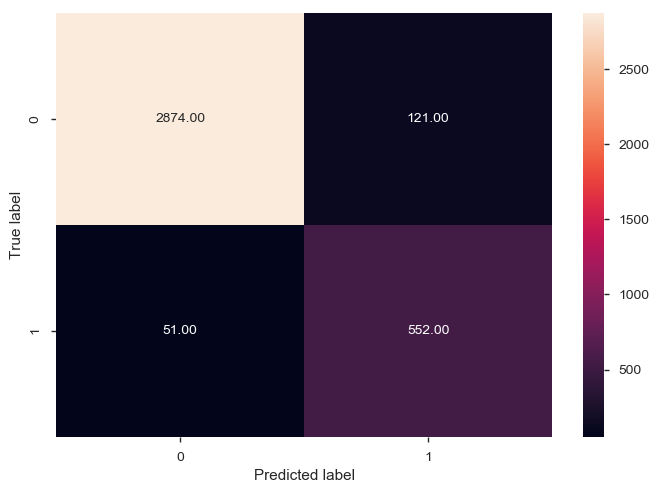

In [119]:
tree_cm = metrics.confusion_matrix( tree_test_predicted.actual,tree_test_predicted.predicted)
sns.heatmap(tree_cm, annot=True,
         fmt='.2f')

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Fine Tuning the parameters

In [139]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,10)}

In [140]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [141]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [142]:
tree.best_params_

{'max_depth': 8, 'max_features': 9}

In [143]:
tree.best_score_

0.9828428452281663

In [144]:
test_pred = tree.predict(test_X)

In [145]:
print(metrics.classification_report(test_y, test_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2995
          1       0.97      0.92      0.94       603

avg / total       0.98      0.98      0.98      3598



### Final DT Model

In [146]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=9 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [147]:
tree_train_predict=pd.DataFrame({'actual':train_y,'predicted':clf_tree.predict(train_X)})

In [148]:
tree_train_predict.head(5)

,actual,predicted
6957,0,0
9240,0,0
618,1,1
9296,0,0
6030,0,0


In [149]:
tree_test_predicted=pd.DataFrame({'actual':test_y,'predicted':clf_tree.predict(test_X)})

In [150]:
tree_test_predicted.head()

,actual,predicted
397,1,1
3107,0,0
9331,0,0
357,1,1
1326,1,1


In [151]:
metrics.accuracy_score(tree_train_predict.actual,tree_train_predict.predicted) 


0.9872512808292625

In [152]:
metrics.accuracy_score(tree_test_predicted.actual,tree_test_predicted.predicted)

0.9819344080044469

Text(0.5,28.3611,'Predicted label')

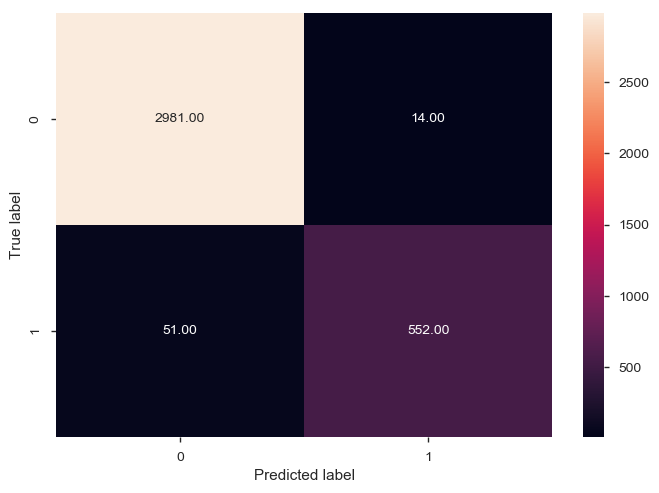

In [153]:
tree_cm = metrics.confusion_matrix( tree_test_predicted.actual,tree_test_predicted.predicted)
sns.heatmap(tree_cm, annot=True,
         fmt='.2f')

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [154]:
print(metrics.classification_report(test_y,clf_tree.predict(test_X)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2995
          1       0.98      0.92      0.94       603

avg / total       0.98      0.98      0.98      3598



In [165]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [166]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "hr_tree.odt",
              feature_names = train_X.columns )

In [167]:
# Converting open document file to jpg imanage

import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [168]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

True

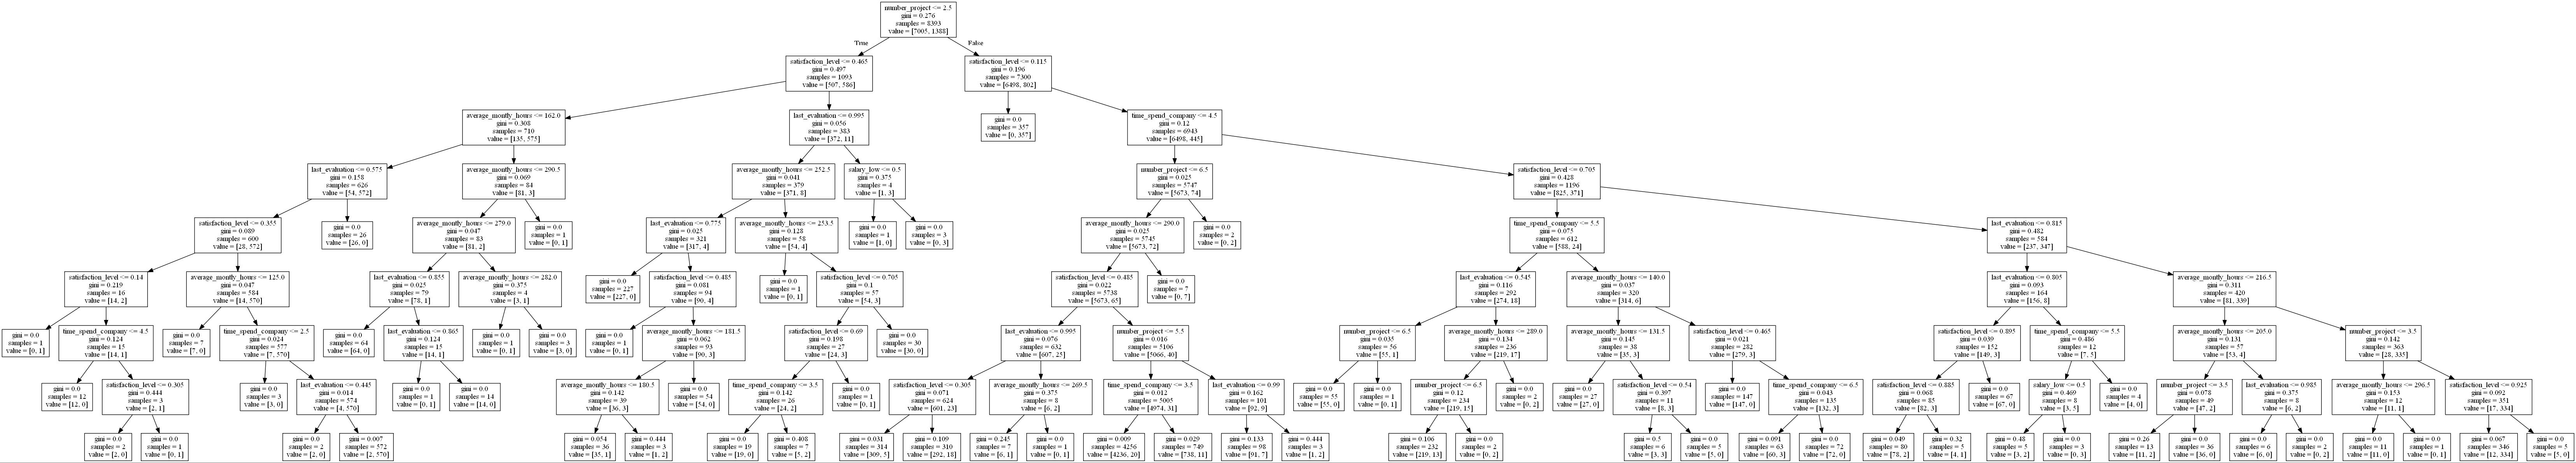

In [169]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='hr_tree.jpg')

In [171]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low
